# 目的：株価分析したいというざっくりとした気持ちを解消する

In [2]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
start = '2020-07-01'
end = ' 2021-07-01'

df = data.DataReader('^N225', 'yahoo', start, end)

# データの確認
adj closeは調整後の価格だからこれを使う

In [6]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-01,22360.310547,22039.560547,22338.300781,22121.730469,67400000,22121.730469
2020-07-02,22267.509766,22072.109375,22182.679688,22145.960938,73600000,22145.960938
2020-07-03,22312.439453,22154.970703,22266.910156,22306.480469,51700000,22306.480469
2020-07-06,22734.109375,22325.750000,22341.269531,22714.439453,58000000,22714.439453
2020-07-07,22742.279297,22540.439453,22649.900391,22614.689453,62700000,22614.689453


In [7]:
date = df.index
price = df['Adj Close']

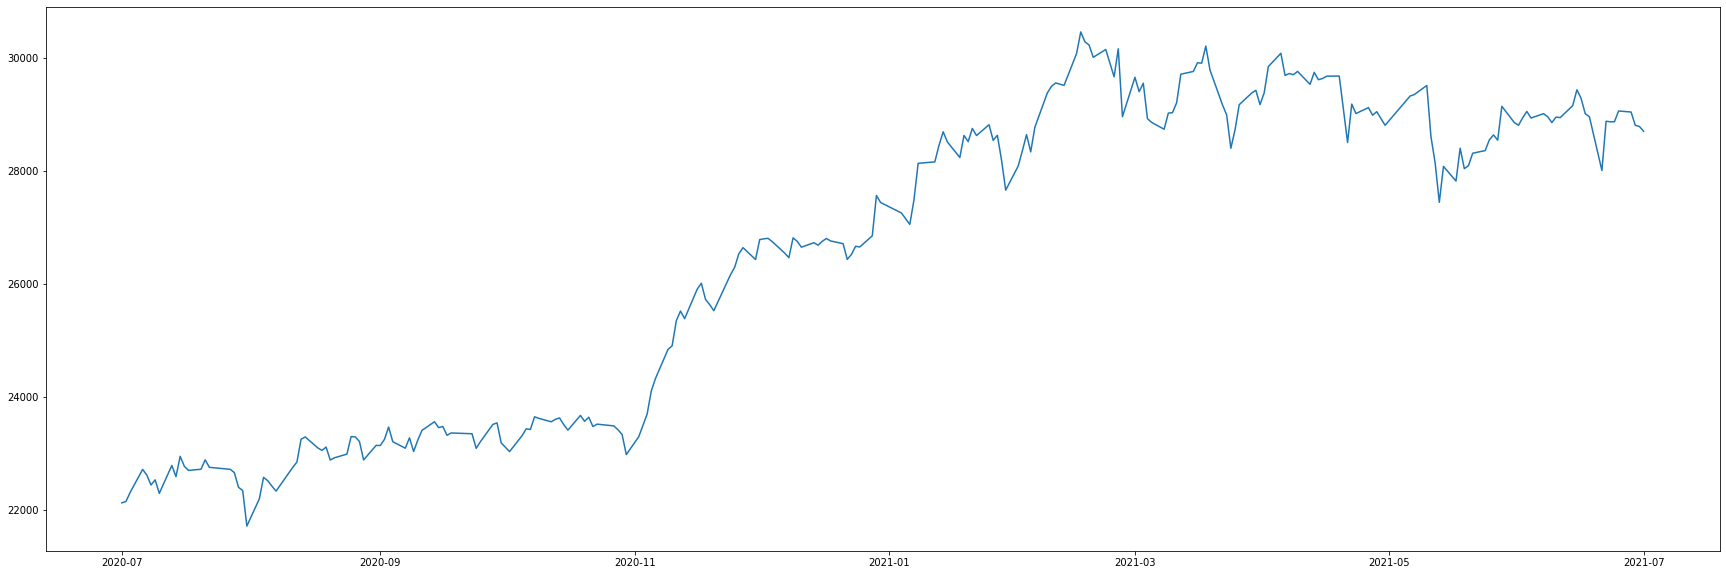

In [8]:
plt.figure (figsize =(30,10))
plt.plot(date,price)

凡例をつける→label
タイトルを付ける→title
軸の名前をつける→xlabel, ylabel
その時はlegendを使う

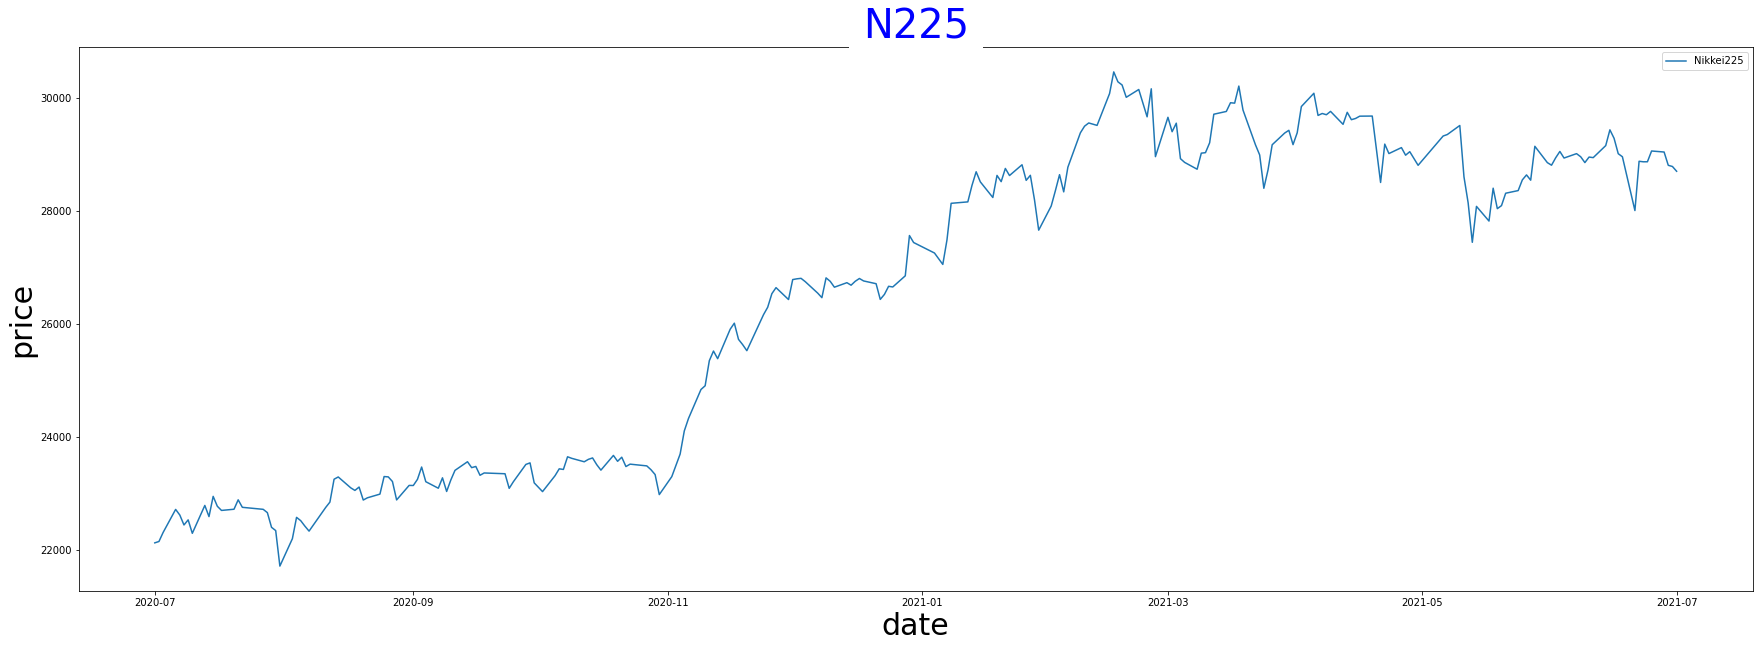

In [9]:
plt.figure(figsize =(30,10))
plt.plot(date, price, label = 'Nikkei225')
plt.title('N225', color = 'blue', backgroundcolor = 'white', size = 40, loc = 'center')
plt.xlabel('date', color = 'black', size = 30)
plt.ylabel('price', color = 'black', size = 30)
plt.legend()

# 移動平均の指標を作成する

In [10]:
span01 = 5
span02 = 25
span03 = 50

df['sma01'] = price.rolling(window = span01).mean()
df['sma02'] = price.rolling(window = span02).mean()
df['sma03'] = price.rolling(window = span03).mean()

In [19]:
pd.set_option('display.max_rows', None)
df.head()

,Open,High,Low,Close,Volume,sma01,sma02,sma03
Date,,,,,,,,
2021-07-01,4770.24,4873.51,4755.48,4858.75,3415881,NaN,NaN,NaN
2021-06-30,4721.06,4780.07,4686.63,4725.98,2431897,NaN,NaN,NaN
2021-06-29,4730.89,4780.07,4686.63,4686.63,2470736,NaN,NaN,NaN
2021-06-28,4765.32,4839.08,4760.40,4809.57,2449893,NaN,NaN,NaN
2021-06-25,4765.32,4844.00,4666.96,4735.80,4193062,4763.346,NaN,NaN


# 追加した3つの指標をプロットする

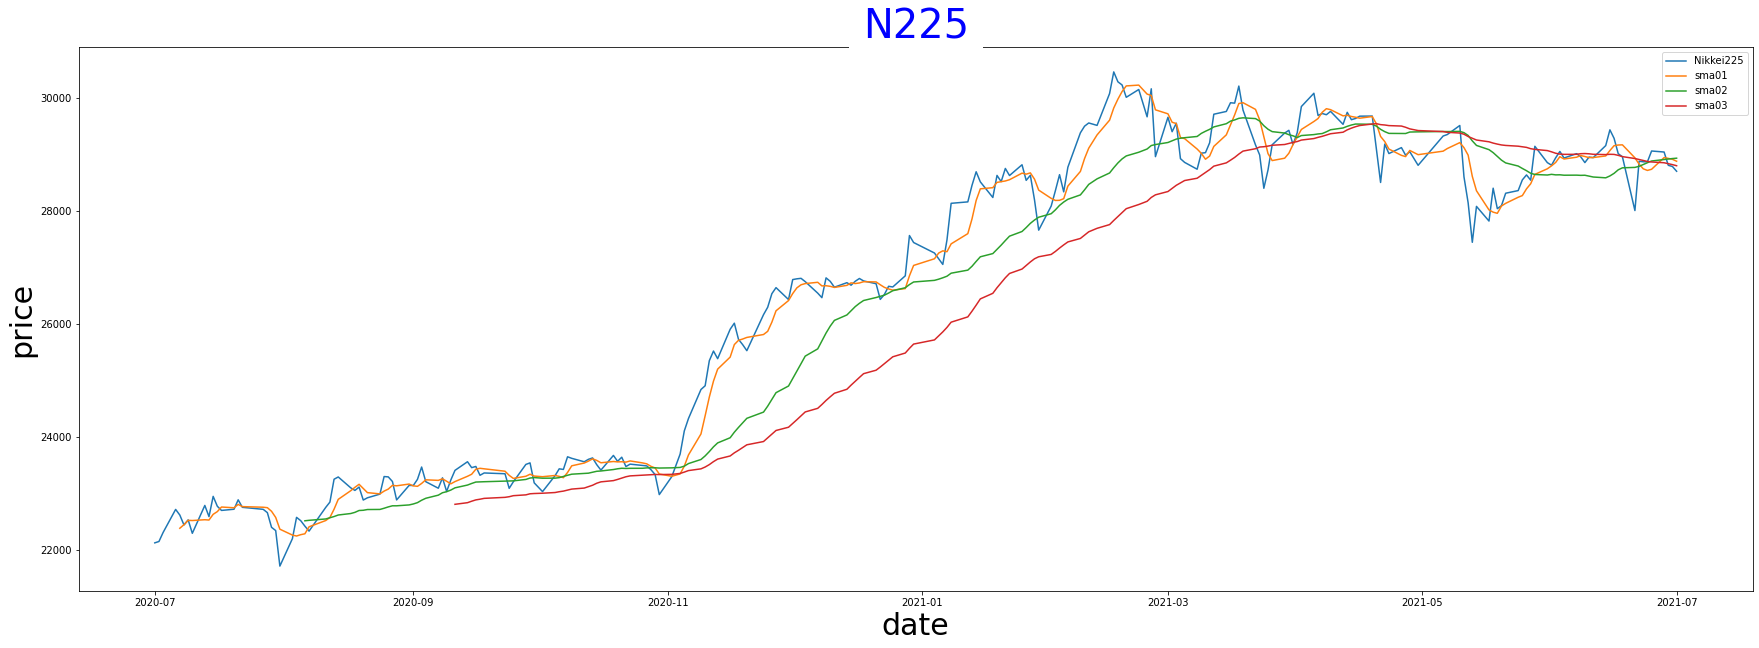

In [12]:
plt.figure(figsize =(30,10))
plt.plot(date, price, label = 'Nikkei225')
plt.plot(date, df['sma01'], label = 'sma01')
plt.plot(date, df['sma02'], label = 'sma02')
plt.plot(date, df['sma03'], label = 'sma03')
plt.title('N225', color = 'blue', backgroundcolor = 'white', size = 40, loc = 'center')
plt.xlabel('date', color = 'black', size = 30)
plt.ylabel('price', color = 'black', size = 30)
plt.legend()

# ゴールデンクロス分析

2020-11　5日が50,25日を下から上にクロスしている

このときに株を買い2021-4に売却していると3000円の利益を作ることができた

# デッドクロス分析

細かく見ていくと3月過ぎ、5月すぎなどに空売りをして利益を作ることができたとわかる


# 棒グラフをプロットする

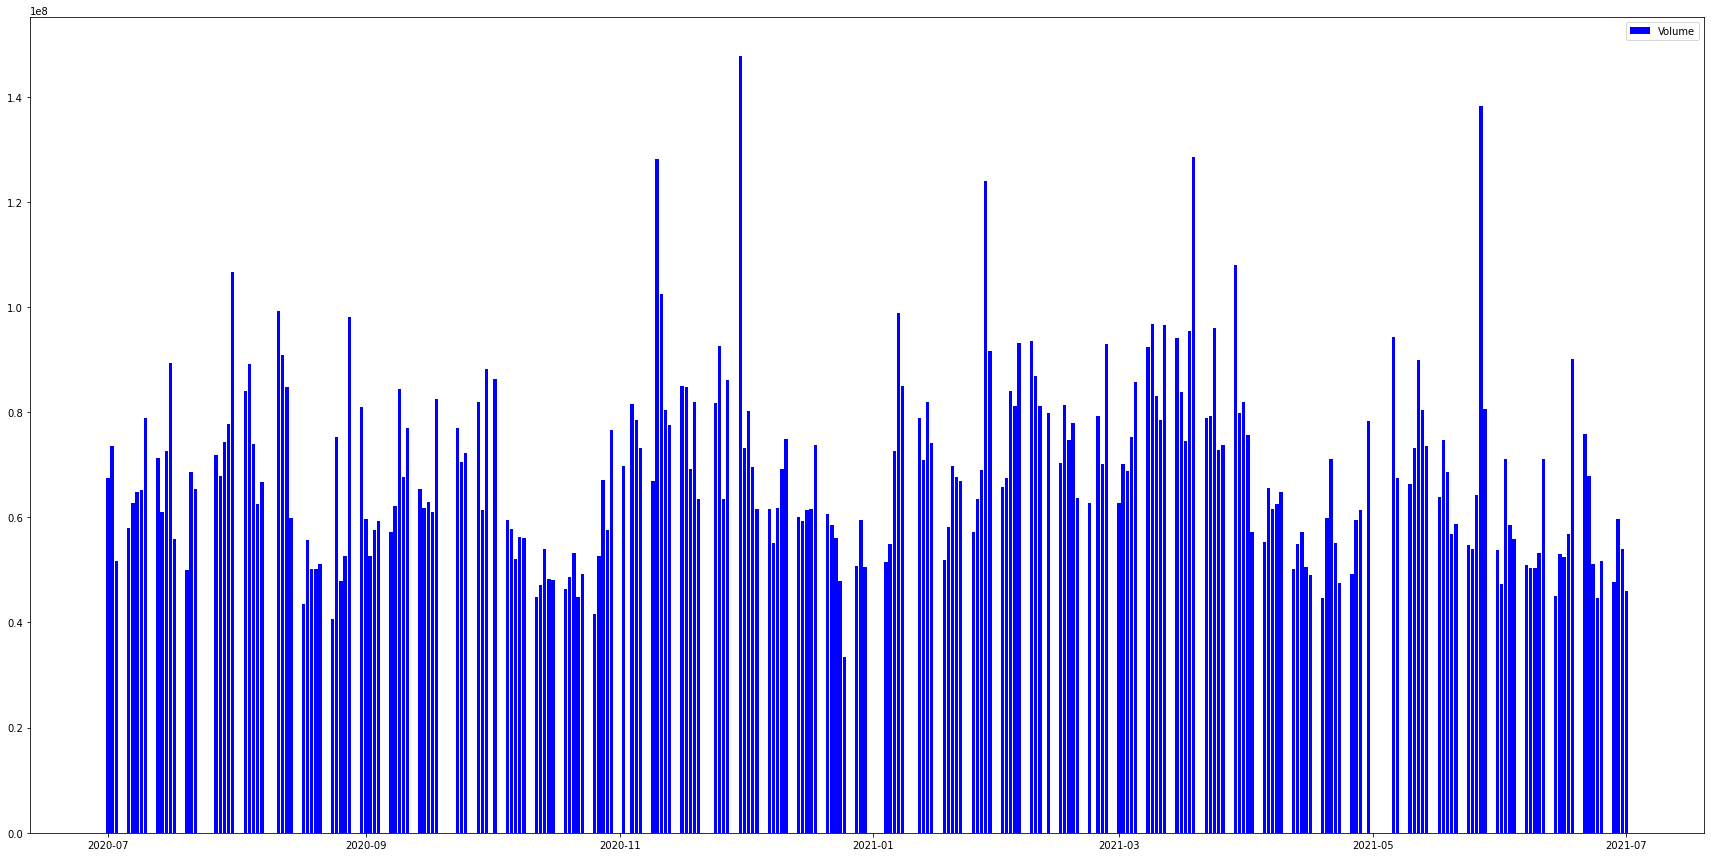

In [13]:
plt.figure(figsize = (30,15))
plt.bar(date, df['Volume'], label = 'Volume', color = 'blue')

plt.legend()

棒グラフと線グラフの２つをプロットしたい
画面の分割→subplot(横、縦、グラフの場所)

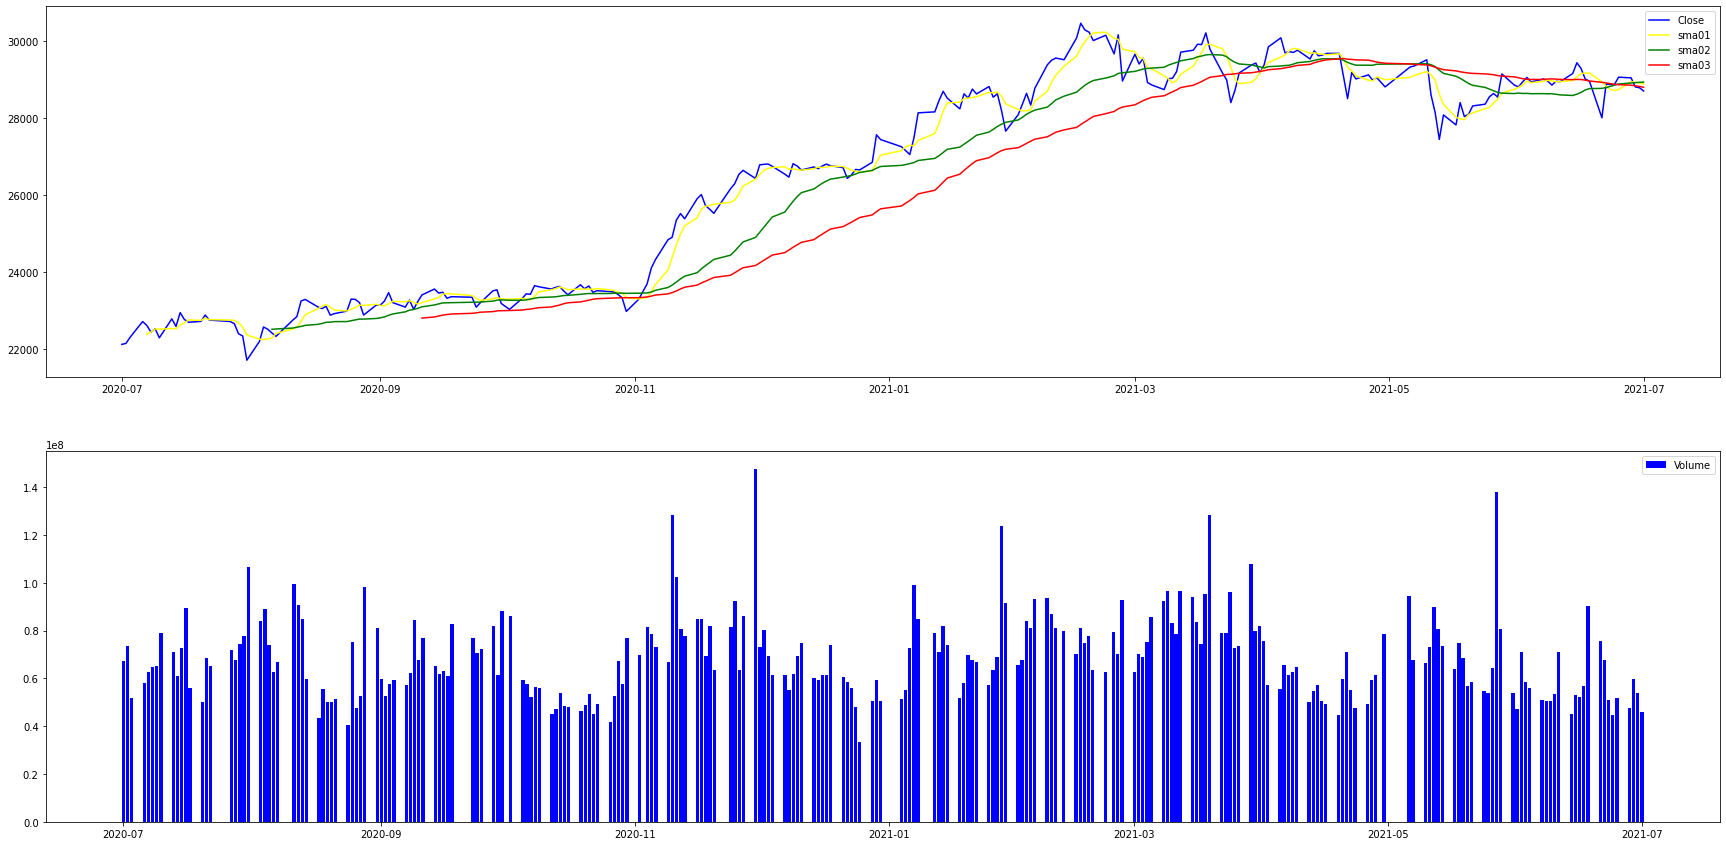

In [14]:
plt.figure(figsize = (30,15))
plt.subplot(2,1,1)

plt.plot(date, price, label = 'Close', color='blue')
plt.plot(date, df['sma01'], label = 'sma01', color = 'yellow')
plt.plot(date, df['sma02'], label = 'sma02', color = 'green')
plt.plot(date, df['sma03'], label = 'sma03', color = 'red')
plt.legend()

plt.subplot(2,1,2)
plt.bar(date, df['Volume'], label = 'Volume', color = 'blue')
plt.legend()

# 個別銘柄で見ていく

In [15]:
start = '2020-07-01'
end = '2021-07-01'
company_code = '6502.JP'

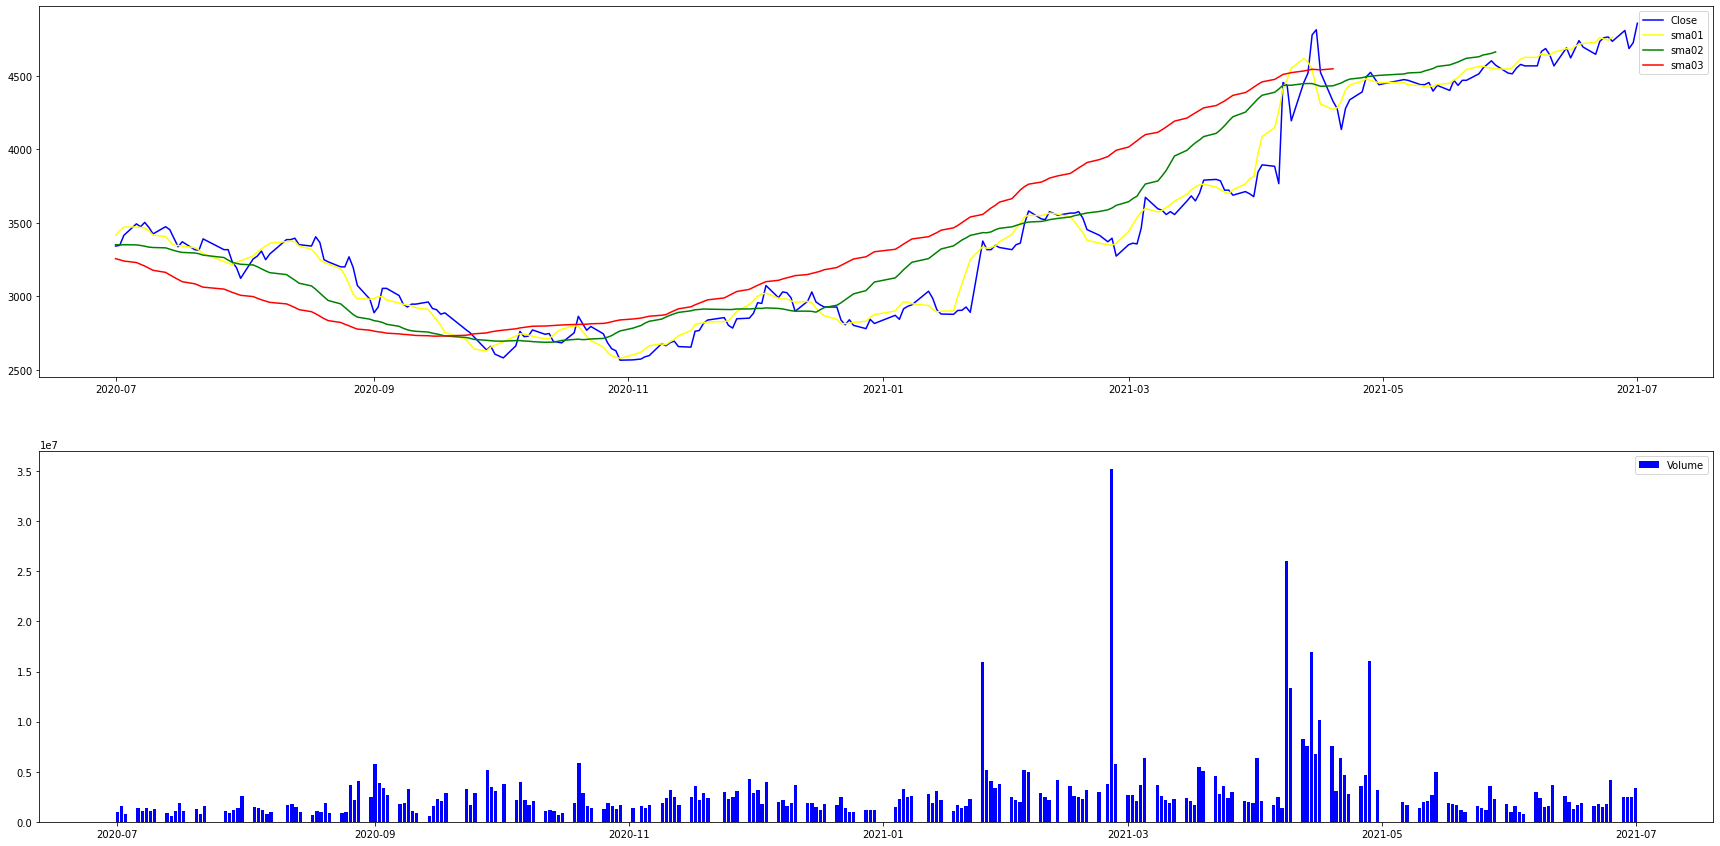

In [16]:


df  = data.DataReader(company_code, 'stooq')
df  = df[(df.index >= start) &  (df.index <= end)]
date = df.index
price = df['Close']

span01 = 5
span02 = 25
span03 = 50

df['sma01'] = price.rolling(window = span01).mean()
df['sma02'] = price.rolling(window = span02).mean()
df['sma03'] = price.rolling(window = span03).mean()

plt.figure(figsize =(30,15))
plt.subplot(2,1,1)

plt.plot(date, price, label = 'Close', color='blue')
plt.plot(date, df['sma01'], label = 'sma01', color = 'yellow')
plt.plot(date, df['sma02'], label = 'sma02', color = 'green')
plt.plot(date, df['sma03'], label = 'sma03', color = 'red')
plt.legend()

plt.subplot(2,1,2)
plt.bar(date, df['Volume'], label = 'Volume', color = 'blue')
plt.legend()

# 関数化して引数を与えるだけでプロットするようにする

In [17]:
def company_stock(start, end, company_code):
    
    df  = data.DataReader(company_code, 'stooq')
    df  = df[(df.index >= start) &  (df.index <= end)]

    date = df.index
    price = df['Close']

    span01 = 5
    span02 = 25
    span03 = 50

    df['sma01'] = price.rolling(window = span01).mean()
    df['sma02'] = price.rolling(window = span02).mean()
    df['sma03'] = price.rolling(window = span03).mean()

    plt.figure(figsize =(30,15))
    plt.subplot(2,1,1)

    plt.plot(date, price, label = 'Close', color='blue')
    plt.plot(date, df['sma01'], label = 'sma01', color = 'yellow')
    plt.plot(date, df['sma02'], label = 'sma02', color = 'green')
    plt.plot(date, df['sma03'], label = 'sma03', color = 'red')
    plt.legend()

    plt.subplot(2,1,2)
    plt.bar(date, df['Volume'], label = 'Volume', color = 'blue')
    plt.legend()

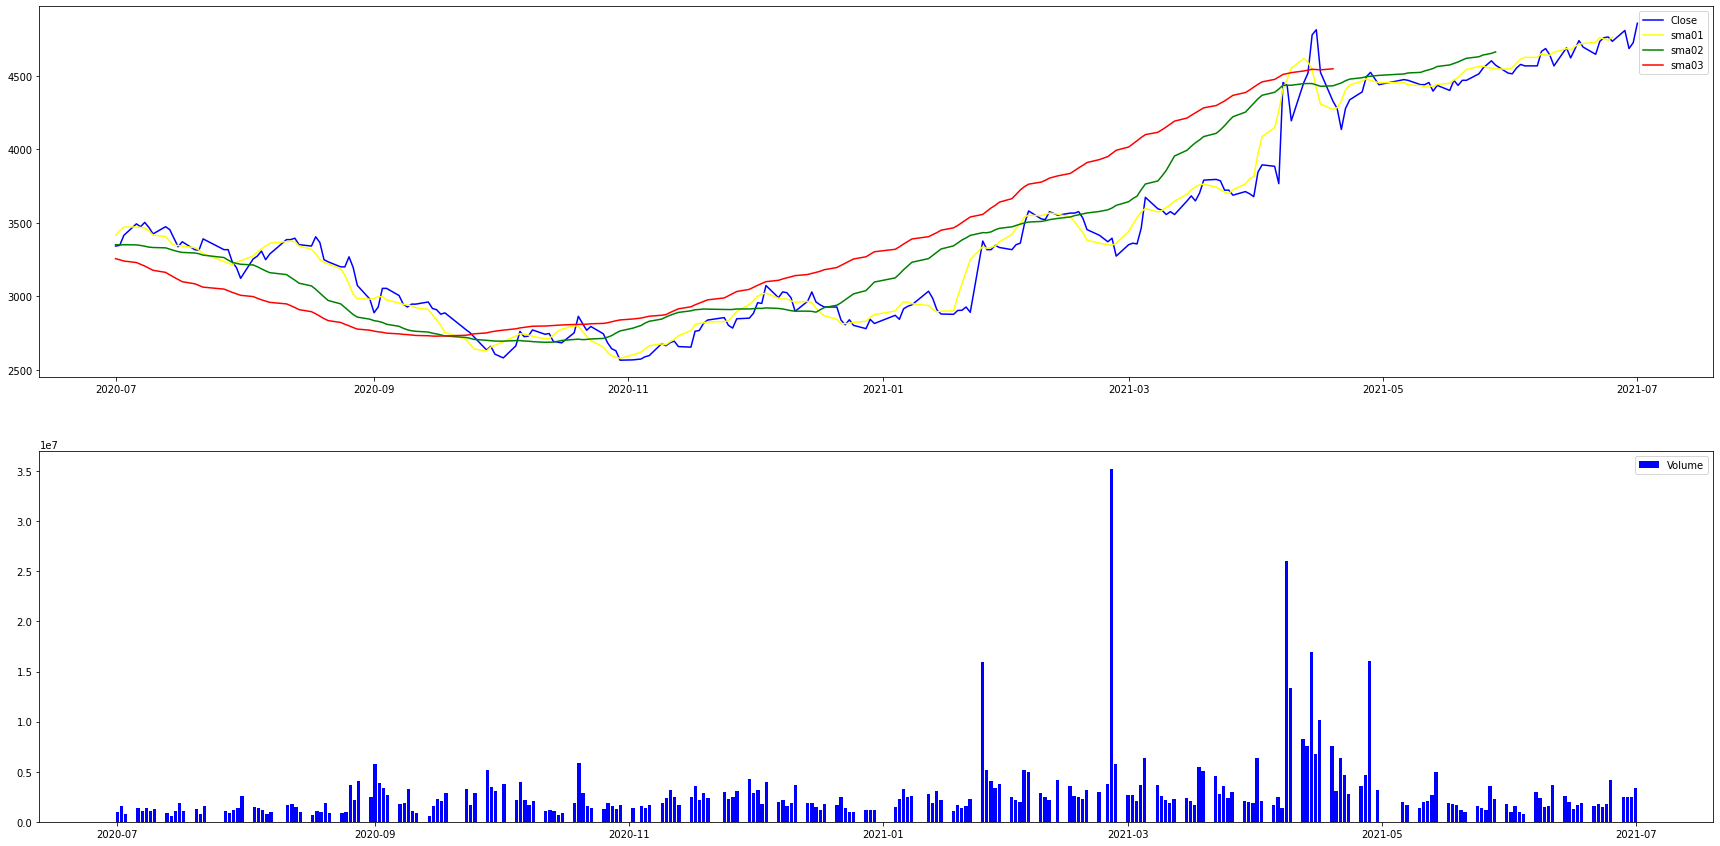

In [18]:
company_stock('2020-07-01', '2021-07-01', '6502.JP')